# Compare FixN LES Sims
## Updated as of 5/24/24
* The below notebook allows one to compare large-eddy simulations.
* All requested 1D and 2D variables are here read and plotted. "load_sims" reports variable that are missing. Lines will not show, if a variable is missing or if it contains missing values.
* In case you find inconsistencies in the benchmark set or wish to expand the code, please contact Ann Fridlind (ann.fridlind@nasa.gov), Timothy Juliano (tjuliano@ucar.edu), and Florian Tornow (ft2544@columbia.edu).

In [12]:
%run functions_plotting.py

keyword_all = 'dx100_FixN.'

In [2]:
vars_mean_list = pd.read_excel('https://docs.google.com/spreadsheets/d/1Vl8jYGviet7EtXZuQiitrx4NSkV1x27aJAhxxjBb9zI/export?gid=0&format=xlsx',
                              sheet_name='Mean')

## short names
var_vec_1d = np.asarray(vars_mean_list.variable_id[vars_mean_list.dimensions == 'time'])
var_vec_2d = np.asarray(vars_mean_list.variable_id[vars_mean_list.dimensions == 'time, height'])

## long names
var_vec_1d_long = np.asarray(vars_mean_list.standard_name[vars_mean_list.dimensions == 'time'])
var_vec_2d_long = np.asarray(vars_mean_list.standard_name[vars_mean_list.dimensions == 'time, height'])

## Units
var_vec_1d_units = np.asarray(vars_mean_list.units[vars_mean_list.dimensions == 'time'])
var_vec_2d_units = np.asarray(vars_mean_list.units[vars_mean_list.dimensions == 'time, height'])

In [13]:
df_col_1d,df_col_2d = load_sims('../../output_les/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=keyword_all,subfolder='sand',diag_zi_ctt=True,ignore='MSU_RCC_LES_SM')

Loading variables: f(time)
../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN.nc
ssaf shows NAN values in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN.nc
../../output_les/sam-pnnl/sandbox/SAM_Lx25_dx100_FixN.nc
clt shows NAN values in ../../output_les/sam-pnnl/sandbox/SAM_Lx25_dx100_FixN.nc
ssaf shows NAN values in ../../output_les/sam-pnnl/sandbox/SAM_Lx25_dx100_FixN.nc
../../output_les/DALES/sandbox/DALES_Lx25_dx100_FixN.nc
iwp not found in ../../output_les/DALES/sandbox/DALES_Lx25_dx100_FixN.nc
od not found in ../../output_les/DALES/sandbox/DALES_Lx25_dx100_FixN.nc
odlc not found in ../../output_les/DALES/sandbox/DALES_Lx25_dx100_FixN.nc
ssaf not found in ../../output_les/DALES/sandbox/DALES_Lx25_dx100_FixN.nc
../../output_les/uclales-salsa/sandbox/UCLALES-SALSA_Lx25_dx100_FixN.nc
ssaf shows NAN values in ../../output_les/uclales-salsa/sandbox/UCLALES-SALSA_Lx25_dx100_FixN.nc
../../output_les/cm1-p3/sandbox/CM1-P3_Lx25_dx100_FixN.nc
pri not found in ../../output_les/cm

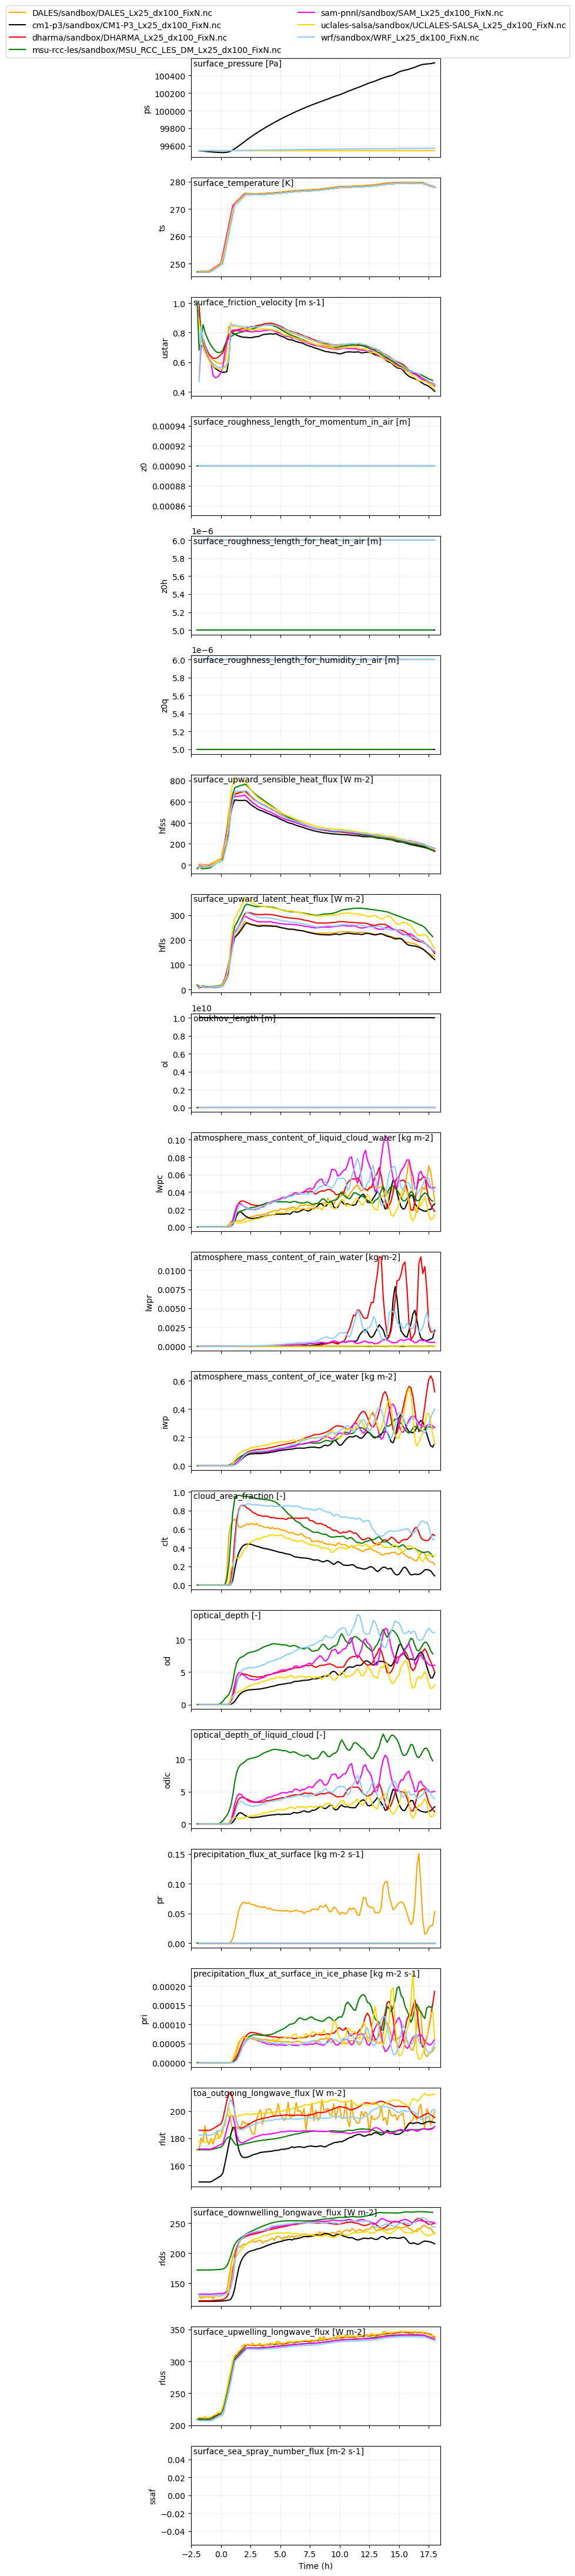

In [11]:
## plot variables that have only time dependence
plot_1d(pd.concat([df_col_1d]),
                   var_vec_1d,longnames=var_vec_1d_long,units=var_vec_1d_units,
                   plot_colors=['orange','k','r','g','magenta','gold','lightskyblue'],plot_ls=['-','-','-','-','-','-','-'])

temporal averaging over 1.0 h interval


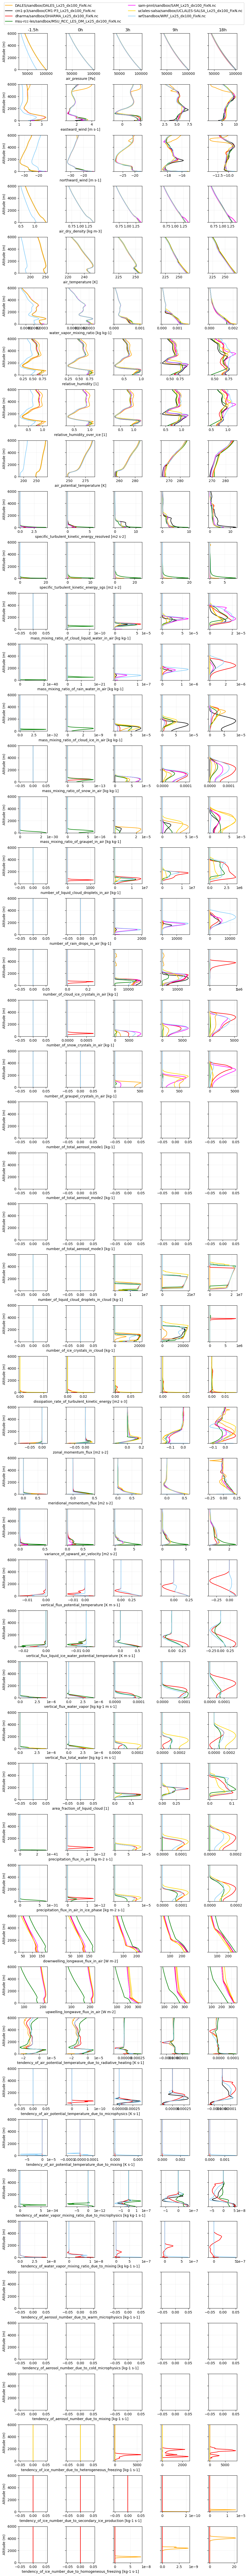

<Figure size 1000x600 with 0 Axes>

In [20]:
%run functions_plotting.py

## example where ERA5 and radiosonde are included
plot_2d(pd.concat([df_col_2d]),
                   var_vec_2d,times=[-1.5,0,3,9,18],z_max=6000,units=var_vec_2d_units,longnames=var_vec_2d_long,
                   plot_colors=['orange','k','r','g','magenta','gold','lightskyblue'])

In [81]:
var_vec_1d_spec = ['ustar','hfss','hfls','cth','ctt']
var_vec_1d_long_spec = np.hstack([[var_vec_1d_long[(var_vec_1d == vv)][0] for vv in var_vec_1d_spec[0:3]],['cloud-top height','cloud-top temperature']])
var_vec_1d_units_spec = np.hstack([[var_vec_1d_units[(var_vec_1d == vv)][0] for vv in var_vec_1d_spec[0:3]],['m','°C']])


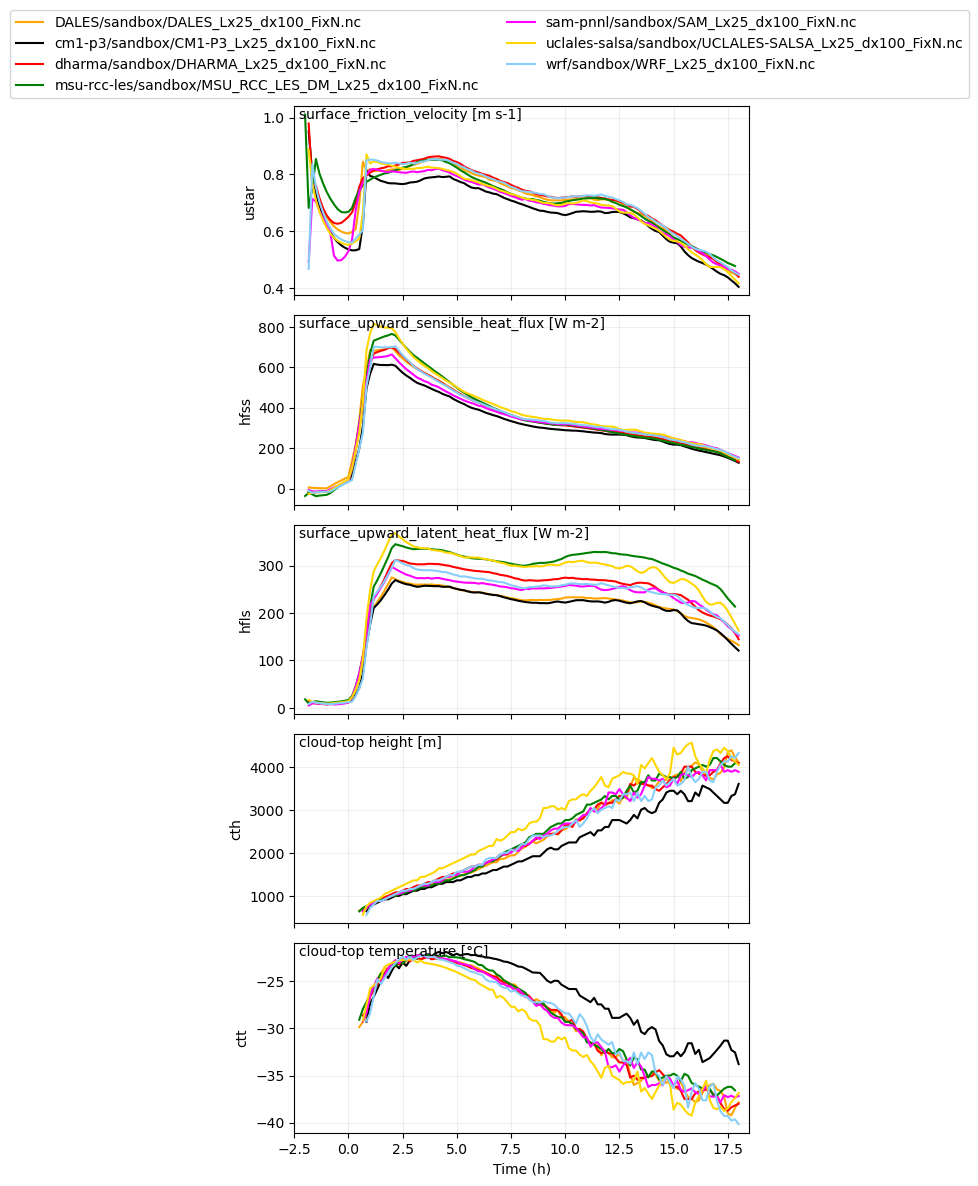

In [83]:
plot_1d(df_col_1d,
        var_vec_1d_spec,longnames=var_vec_1d_long_spec,units=var_vec_1d_units_spec,
        plot_colors=['orange','k','r','g','magenta','gold','lightskyblue'],plot_ls=['-','-','-','-','-','-','-'])